In [5]:
import os
import config
import numpy as np
import pandas as pd
from scipy.signal import resample
from scipy.stats import mode

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [8]:
data_dir = "../../data/dataset/raw/"
subjects = os.listdir(data_dir)
gestures = config.GESTURES
learning_rate = 3e-4

In [9]:
dataset = pd.DataFrame()

for subject in subjects:
    for gesture in config.GESTURES:
        gesture_dir = os.path.join(data_dir, subject, gesture)
        recordings = os.listdir(gesture_dir)
        for recording in recordings:
            file_path = os.path.join(gesture_dir, recording)
            data = pd.read_csv(file_path)
            data.drop(columns=["time"], inplace=True)
            data = data.apply(resample, args=(config.SEGMENT_LEN, None, 0))

        #     # ... calculating distance of the index finger
        #     data["drf1"] = ((data["rf1x"] - data["rpx"]).pow(2) + \
        #             (data["rf1z"] - data["rpz"]).pow(2)).pow(0.5)

        #     data["dlf1"] = ((data["lf1x"] - data["lpx"]).pow(2) + \
        #             (data["lf1z"] - data["lpz"]).pow(2)).pow(0.5)

            data["drf0x"] = data["rf0x"] - data["rpx"]
            data["drf0y"] = data["rf0y"] - data["rpy"]
            data["drf0z"] = data["rf0z"] - data["rpz"]

            data["drf1x"] = data["rf1x"] - data["rpx"]
            data["drf1y"] = data["rf1y"] - data["rpy"]
            data["drf1z"] = data["rf1z"] - data["rpz"]

            data["label"] = config.GESTURES.index(gesture)

            dataset = pd.concat([dataset, data])

dataset.reset_index(inplace=True)
dataset

,index,rpx,rpy,rpz,lpx,lpy,lpz,rf0x,rf0y,rf0z,...,lf4x,lf4y,lf4z,drf0x,drf0y,drf0z,drf1x,drf1y,drf1z,label
0,0,7.919871,32.937358,13.040457,39.663028,34.199817,19.763141,6.957625,31.458863,6.394413,...,36.970489,19.440563,11.496098,-0.962246,-1.478495,-6.646044,-1.219138,-6.571643,-17.891781,0
1,1,35.802107,168.358689,52.411913,185.849615,160.250569,92.604431,-27.924779,151.538837,28.993743,...,173.233150,91.092922,53.867430,-63.726887,-16.819852,-23.418170,-32.447528,-10.479782,-88.812099,0
2,2,35.709530,165.945607,53.001519,184.716385,159.273431,92.039769,-21.683797,150.278150,28.938370,...,172.176850,90.537478,53.538970,-57.393327,-15.667456,-24.063150,-29.553679,-12.477695,-87.847741,0
3,3,35.858950,167.791059,52.827634,185.849615,160.250569,92.604431,-25.418628,151.425699,29.072187,...,173.233150,91.092922,53.867430,-61.277578,-16.365361,-23.755447,-31.356811,-11.310929,-88.603188,0
4,4,35.683890,166.213800,52.880427,184.716385,159.273431,92.039769,-22.773460,150.403668,28.943631,...,172.176850,90.537478,53.538970,-58.457350,-15.810133,-23.936796,-30.038383,-12.106708,-87.953241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40699,251,48.119727,214.613029,33.995488,184.368548,127.918388,95.951430,-5.293787,194.742468,4.554490,...,167.620172,51.236467,65.957223,-53.413513,-19.870560,-29.440998,-37.667256,-27.711561,-57.491350,13
40700,252,47.843869,213.187481,33.986822,183.237452,127.133612,95.362770,-5.581431,193.557259,4.761509,...,166.591828,50.922133,65.552577,-53.425300,-19.630222,-29.225313,-37.753480,-25.736733,-59.263746,13
40701,253,48.154319,215.182833,33.958767,184.368548,127.918388,95.951430,-5.477001,195.448162,4.385848,...,167.620172,51.236467,65.957223,-53.631320,-19.734671,-29.572919,-38.123656,-25.417854,-60.678584,13
40702,254,47.906485,213.421478,34.124816,183.237452,127.133612,95.362770,-5.902233,194.132714,4.944356,...,166.591828,50.922133,65.552577,-53.808718,-19.288764,-29.180460,-38.122983,-23.035166,-62.467568,13


In [10]:
features = dataset[config.INFERENCE_FEATURES + ["label"]]
features

,rpx,rpy,rpz,rf0x,rf0y,rf0z,rf1x,rf1y,rf1z,label
0,7.919871,32.937358,13.040457,6.957625,31.458863,6.394413,6.700733,26.365715,-4.851325,0
1,35.802107,168.358689,52.411913,-27.924779,151.538837,28.993743,3.354579,157.878907,-36.400186,0
2,35.709530,165.945607,53.001519,-21.683797,150.278150,28.938370,6.155851,153.467911,-34.846222,0
3,35.858950,167.791059,52.827634,-25.418628,151.425699,29.072187,4.502139,156.480130,-35.775553,0
4,35.683890,166.213800,52.880427,-22.773460,150.403668,28.943631,5.645507,154.107092,-35.072814,0
...,...,...,...,...,...,...,...,...,...,...
40699,48.119727,214.613029,33.995488,-5.293787,194.742468,4.554490,10.452471,186.901467,-23.495863,13
40700,47.843869,213.187481,33.986822,-5.581431,193.557259,4.761509,10.090389,187.450748,-25.276924,13
40701,48.154319,215.182833,33.958767,-5.477001,195.448162,4.385848,10.030663,189.764979,-26.719818,13
40702,47.906485,213.421478,34.124816,-5.902233,194.132714,4.944356,9.783502,190.386312,-28.342752,13


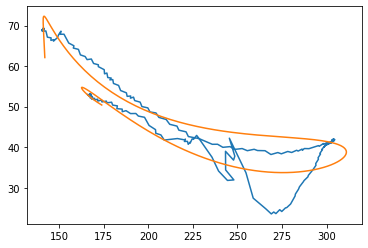

In [45]:
import matplotlib.pyplot as plt
t = np.linspace(0, 1, 250)
rpx = features.loc[1:250, "rpy"].to_numpy()
rpy = features.loc[1:250, "rpz"].to_numpy()

f1 = np.poly1d(np.polyfit(t, rpx, 7))
_rpx = f1(t)

f2 = np.poly1d(np.polyfit(t, rpy, 7))
_rpy = f2(t)

plt.plot(rpx, rpy)
plt.plot(_rpx, _rpy)
# z(x).shape

In [5]:
import tensorflow as tf

from tensorflow.keras import layers, models, losses, optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

2022-06-11 16:50:13.913432: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [6]:
scaler = MinMaxScaler()
X = features.drop(columns=["label"]).to_numpy()
X = scaler.fit_transform(X)
X = X.reshape((-1, config.SEGMENT_LEN, len(config.INFERENCE_FEATURES)))
y = features["label"].to_numpy().reshape((-1, config.SEGMENT_LEN))
y, _ = mode(y, axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


In [7]:
def conv_block_1d():
    inputs = layers.Input(shape=(config.SEGMENT_LEN, 1))
    x = layers.BatchNormalization()(inputs)
    x = layers.Conv1D(8, 3, activation="selu")(x)
    x = layers.Conv1D(8, 3, activation="selu")(x)
    x = layers.MaxPool1D(2)(x)
    x = layers.Conv1D(8, 3, activation="selu")(x)
    x = layers.Conv1D(8, 3, activation="selu")(x)
    x = layers.MaxPool1D(2)(x)
    x = layers.Conv1D(16, 3, activation="selu")(x)
    x = layers.Conv1D(16, 3, activation="selu")(x)
    x = layers.MaxPool1D(2)(x)
    x = layers.Conv1D(16, 3, activation="selu")(x)
    x = layers.Conv1D(16, 3, activation="selu")(x)
    x = layers.MaxPool1D(2)(x)
    x = layers.Flatten()(x)
    output = layers.Dense(64)(x)

    return inputs, output

def get_model(n_channels: int):
    inputs = []
    features = []

    for _ in range(n_channels):
        input_1d, features_1d = conv_block_1d()
        inputs.append(input_1d)
        features.append(features_1d)

    x = layers.concatenate(features, axis=-1)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    output = layers.Dense(len(gestures), activation="softmax")(x)

    return models.Model(inputs, output)

In [8]:
model = get_model(n_channels=len(config.INFERENCE_FEATURES))

loss = losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=["accuracy"]
)

2022-06-11 16:50:14.925546: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-11 16:50:14.925576: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Andromeda
2022-06-11 16:50:14.925580: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Andromeda
2022-06-11 16:50:14.925693: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.73.5
2022-06-11 16:50:14.925708: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.73.5
2022-06-11 16:50:14.925711: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.73.5
2022-06-11 16:50:14.925955: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions i

In [9]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=70,
        restore_best_weights=True
    )
]

history = model.fit(
    x=np.split(X_train, len(config.INFERENCE_FEATURES), axis=-1),
    y=y_train,
    validation_data=(
        np.split(X_test, len(config.INFERENCE_FEATURES), axis=-1),
        y_test
    ),
    batch_size=32,
    epochs=300,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/300
4/4 [==============================] - 5s 274ms/step - loss: 3.8664 - accuracy: 0.0796 - val_loss: 2.7682 - val_accuracy: 0.1579
Epoch 2/300
4/4 [==============================] - 0s 36ms/step - loss: 3.0214 - accuracy: 0.1416 - val_loss: 2.6598 - val_accuracy: 0.2105
Epoch 3/300
4/4 [==============================] - 0s 36ms/step - loss: 2.5686 - accuracy: 0.2920 - val_loss: 2.6129 - val_accuracy: 0.2281
Epoch 4/300
4/4 [==============================] - 0s 35ms/step - loss: 2.2604 - accuracy: 0.2655 - val_loss: 2.5643 - val_accuracy: 0.1754
Epoch 5/300
4/4 [==============================] - 0s 35ms/step - loss: 1.9143 - accuracy: 0.3717 - val_loss: 2.5468 - val_accuracy: 0.1930
Epoch 6/300
4/4 [==============================] - 0s 36ms/step - loss: 1.6279 - accuracy: 0.4602 - val_loss: 2.5212 - val_accuracy: 0.1579
Epoch 7/300
4/4 [==============================] - 0s 36ms/step - loss: 1.4322 - accuracy: 0.5398 - val_loss: 2.4695 - val_accuracy: 0.1228
Epoch 8/300
4/4 [==

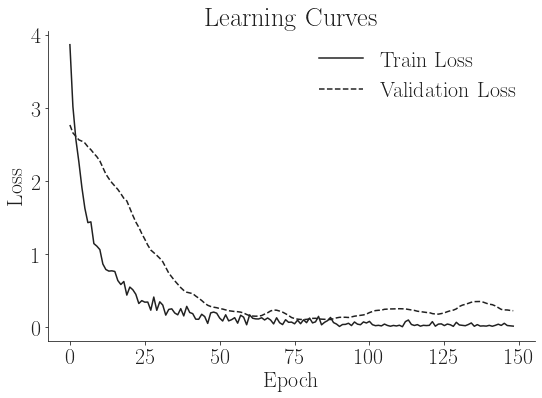

In [15]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 22,
    "text.color": "#212121",
    "axes.edgecolor": "#212121",
    "xtick.color": "#212121",
    "ytick.color": "#212121",
    "axes.labelcolor": "#212121",
    'legend.frameon': False,
})

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
ax.plot(history.history["loss"], "-", color="#212121", label="Train Loss")
ax.plot(history.history["val_loss"], "--", color="#212121", label="Validation Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Learning Curves")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
tf.keras.backend.clear_session()

In [12]:
import joblib
joblib.dump(scaler, "../../model/scaler.joblib")
model.save("../../model/stack_cnn")

INFO:tensorflow:Assets written to: ../../model/stack_cnn/assets


INFO:tensorflow:Assets written to: ../../model/stack_cnn/assets
